# Import Libraries

In [1]:
from cm_api import *
from cm_config import config
import datetime
from helper_funct import *
from helper_funct1 import *
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [93]:
rt = config['refresh_token']
api_token = get_api_token(rt)

# Collect Data From Tiktok Weekly Chart

In [6]:
data = get_tiktok_chart_data(api_token, 'tracks', '2021-03-09', 'weekly')

In [9]:
# data[0]

# Parse Tiktok Data
parse raw data into pandas dataframe with the following columns:

'rank', 'added_at', 'title', 'artist', 'isrc', 'velocity', 'cm_id', 'time_on_chart', 'release_dates']

In [11]:
tiktok_df = parse_tiktok_data(data)

In [12]:
tiktok_df.head()

,rank,added_at,title,artist,isrc,velocity,cm_id,time_on_chart,release_dates
0,1,2021-03-09T00:00:00.000Z,Sugarcrash!,ElyOtto,TCAFB2092742,0.285714,31221266.0,40,[2020-08-25T00:00:00.000Z]
2,3,2021-03-09T00:00:00.000Z,WITHOUT YOU,The Kid LAROI.,USSM12006586,0.285714,31894832.0,92,[2020-11-06T00:00:00.000Z]
3,4,2021-03-09T00:00:00.000Z,Aesthetic,Xilo,QZFZ22071847,-0.285714,28796568.0,262,[2020-02-14T00:00:00.000Z]
6,7,2021-03-09T00:00:00.000Z,Bad (2012 Remaster),Michael Jackson,USSM18700002,-0.428571,15813757.0,19,"[2012-11-30T00:00:00.000Z, 1995-06-16T00:00:00..."
7,8,2021-03-09T00:00:00.000Z,the bob for me,aqyila,QZFYZ2164782,-0.142857,32651909.0,12,[2020-12-26T00:00:00.000Z]


# Get Artist IDs (Chartmetric)

In [19]:
def create_artist_id_feat(dataframe):
    from cm_api import get_track_metadata
    bucket = []
    for row in dataframe.iterrows():
        track_id = row[1]['cm_id']
        artist_id = get_track_metadata(api_token, track_id)['artists'][0]['id']
        bucket.append(artist_id)

    dataframe['cm_artist_id'] = bucket
    return dataframe

In [22]:
df = create_artist_id_feat(tiktok_df)

# Data Cleaning

## remove timestamp from add date

In [26]:
df['added_at'] = pd.to_datetime(df['added_at']).dt.date

## Engineer `Before_Tiktok_Date`
7 days before record's first occurance on Tiktok chart. `added_at` - (`time_on_chart` + 7)

In [31]:
def create_before_tiktok_date_feat(dataframe):
    #takes in dataframe with `added_at` and `time_on_chart`
    #returns dataframe with new date feature
    bucket = []
    for row in dataframe.iterrows():
        add_date = row[1]['added_at'] #get add_date of chart
        days = int(row[1]['time_on_chart']) + 7 #adding 7 to total time on chart
        bucket.append(add_date - datetime.timedelta(days=days))

    dataframe['Before_Tiktok_Date'] = bucket
    return dataframe
    

In [32]:
df1 = create_before_tiktok_date_feat(df)

In [40]:
df1.sort_values('Before_Tiktok_Date', ascending=True)

,rank,added_at,title,artist,isrc,velocity,cm_id,time_on_chart,release_dates,cm_artist_id,Before_Tiktok_Date
66,67,2021-03-09,Classical Music,Classical Music,TCAAU1178628,1.428571,20877140.0,301,[2011-02-03T00:00:00.000Z],141006,2020-05-05
94,95,2021-03-09,ily (i love you baby),Surf Mesa,QZJRC1945204,NaN,27755710.0,267,"[2019-11-26T00:00:00.000Z, 2019-11-26T00:00:00...",1793858,2020-06-08
55,56,2021-03-09,Monkeys Spinning Monkeys,Kevin MacLeod,USUAN1400011,-0.285714,17158836.0,266,"[2014-12-30T00:00:00.000Z, 2019-10-10T00:00:00...",333690,2020-06-09
3,4,2021-03-09,Aesthetic,Xilo,QZFZ22071847,-0.285714,28796568.0,262,[2020-02-14T00:00:00.000Z],3377623,2020-06-13
29,30,2021-03-09,Steven Universe,L.Dre,QZFZ32084911,7.142857,28637630.0,260,[2020-02-21T00:00:00.000Z],751357,2020-06-15
...,...,...,...,...,...,...,...,...,...,...,...
12,13,2021-03-09,Apaga a Luz Apaga Tudo 150Bpm,MC Topre,US7VG2175883,NaN,32999109.0,6,[2021-02-22T00:00:00.000Z],720112,2021-02-24
96,97,2021-03-09,Быстро,Colorit,RUB422100407,NaN,32954965.0,6,[2021-02-22T00:00:00.000Z],4143223,2021-02-24
48,49,2021-03-09,Pull Me Closer,Dimitri Vegas,BEG852100008,NaN,33198004.0,6,[2021-03-05T00:00:00.000Z],1595488,2021-02-24
42,43,2021-03-09,Reloj,Rauw Alejandro & Anuel AA,USSD12000471,NaN,31750071.0,5,"[2020-10-22T00:00:00.000Z, 2020-11-13T00:00:00...",224838,2021-02-25


# Engineer `total_spotify_followers`
total Spotify followers on `Before_Tiktok_Date`

In [49]:
def create_spotify_followers_before_feat(dataframe):
    from cm_api import get_fan_metrics
    bucket = []
    for row in dataframe.iterrows():
        before_date = row[1]['Before_Tiktok_Date']
        after_date = row[1]['Before_Tiktok_Date'] + datetime.timedelta(days=5)
        artist_id = row[1]['cm_artist_id']
        data = get_fan_metrics(api_token, artist_id,'spotify', before_date, after_date, field='followers')['followers']
        if len(data) > 0:
            tup = (data[0]['value'], data[-1]['value'])
            bucket.append(tup)
        else:
            tup = (None, None)
            bucket.append(tup) 

    dataframe['total_spotify_followers'] = [x[0] for x in bucket]
    return dataframe


In [50]:
df2 = create_spotify_followers_before_feat(df1)

# Feature Engineer - Track Age
categorial value for track age on chart
`a month` == x <=30; `2 months` 60 >= x > 30; `over 2 months` x> 60

In [80]:
int(df2['time_on_chart'][0])

40

In [82]:
df2['track_age'] = df2['time_on_chart'].apply(lambda x: 'a month' if int(x) <= 30 else ('2 months' if 60 >= int(x) > 30 else 'over 2 months'))

## Filter dataset down to records with track age of a month

In [97]:
young_trax = df2.loc[df2['track_age'] == 'a month'].reset_index().drop(axis=1, labels='index')


### Find IG followers for before date

In [98]:
def create_instagram_followers_before_feat(dataframe):
    from cm_api import get_fan_metrics
    bucket = []
    for row in dataframe.iterrows():
        before_date = row[1]['Before_Tiktok_Date']
        after_date = row[1]['Before_Tiktok_Date'] + datetime.timedelta(days=5)
        artist_id = row[1]['cm_artist_id']
        data = get_fan_metrics(api_token, artist_id,'instagram', before_date, after_date, field='followers')['followers']
        if len(data) > 0:
            tup = (data[0]['value'], data[-1]['value'])
            bucket.append(tup)
        else:
            tup = (None, None)
            bucket.append(tup) 

    dataframe['total_ig_followers'] = [x[0] for x in bucket]
    return dataframe

In [100]:
yt2 = create_instagram_followers_before_feat(young_trax)

In [109]:
df2.keys()

Index(['rank', 'added_at', 'title', 'artist', 'isrc', 'velocity', 'cm_id',
       'time_on_chart', 'release_dates', 'cm_artist_id', 'Before_Tiktok_Date',
       'total_spotify_followers', 'track_age'],
      dtype='object')

# Save Dataset



In [85]:
#save full dataset - 85 songs
df2.to_csv('/home/bull/Documents/bull-analytics/blog7/data/top_tiktok_artists.csv', index_label='index')

In [102]:
#save dataset of 1 month old records
yt2.to_csv('/home/bull/Documents/bull-analytics/blog7/data/one_month_trax.csv', index_label='index')

# Analysis

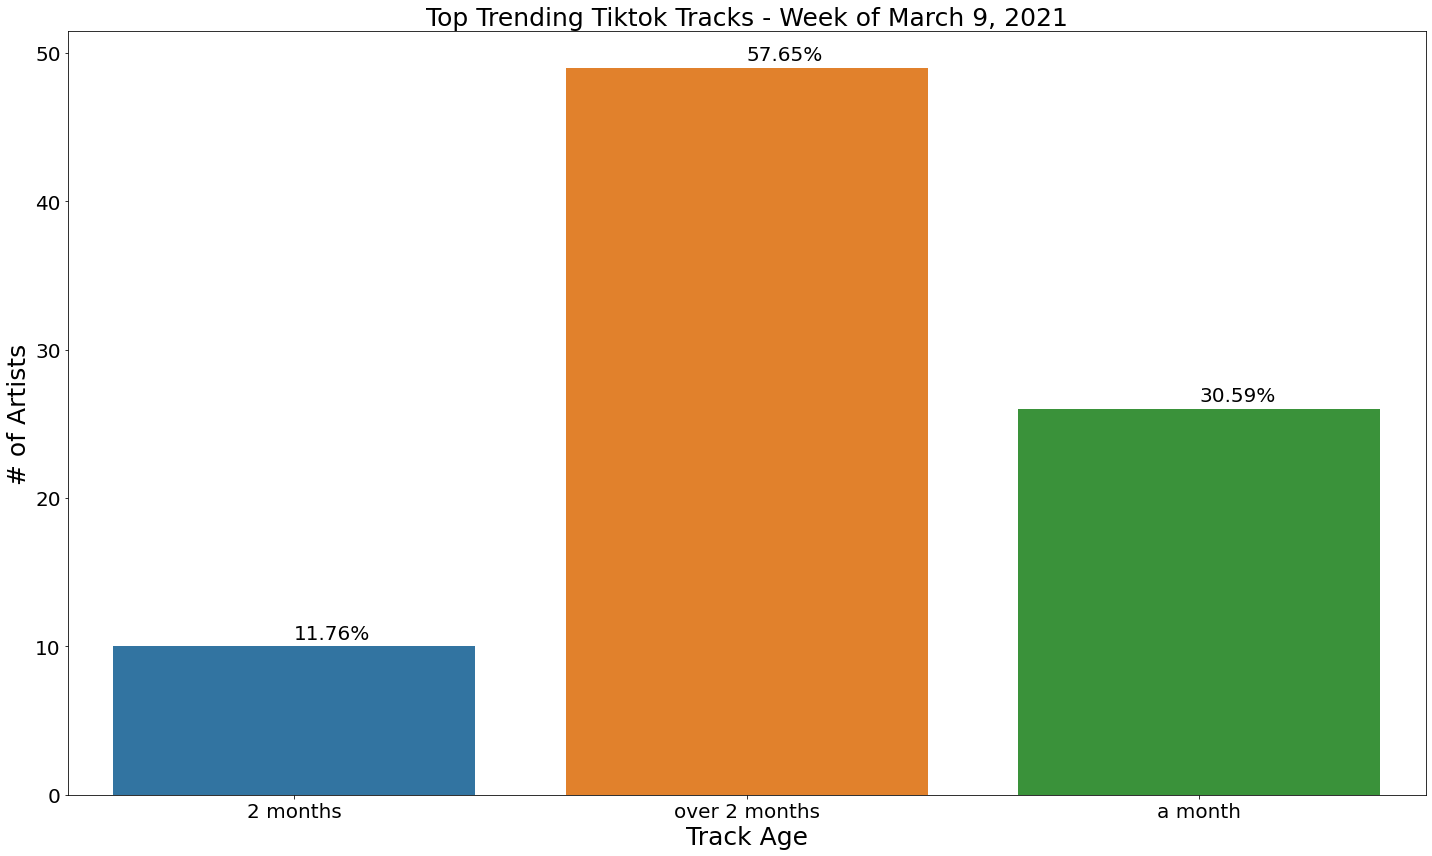

In [158]:
fig = figure(figsize=(20,12))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
graph = sns.countplot(data=df2, x='track_age')
plt.xticks(rotation=0)
plt.title('Top Trending Tiktok Tracks - Week of March 9, 2021', size=25)
plt.ylabel('# of Artists', size=25)
plt.xlabel('Track Age', size=25)
plt.ticklabel_format(style='plain', axis='y') #change xaxis from sci to plain style
plt.tick_params(axis='both', which='major', labelsize=20)

for bar in graph.patches:
    graph.annotate((format((bar.get_height()/len(df2))*100, '.2f'))+'%', (bar.get_x() + bar.get_width()/2, bar.get_height()+.5), size=20)

plt.tight_layout()
plt.savefig('/home/bull/Documents/bull-analytics/blog7/visuals/track_age.jpeg')
plt.show()

/home/bull/Documents/practice1/test/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_ig_followers'>

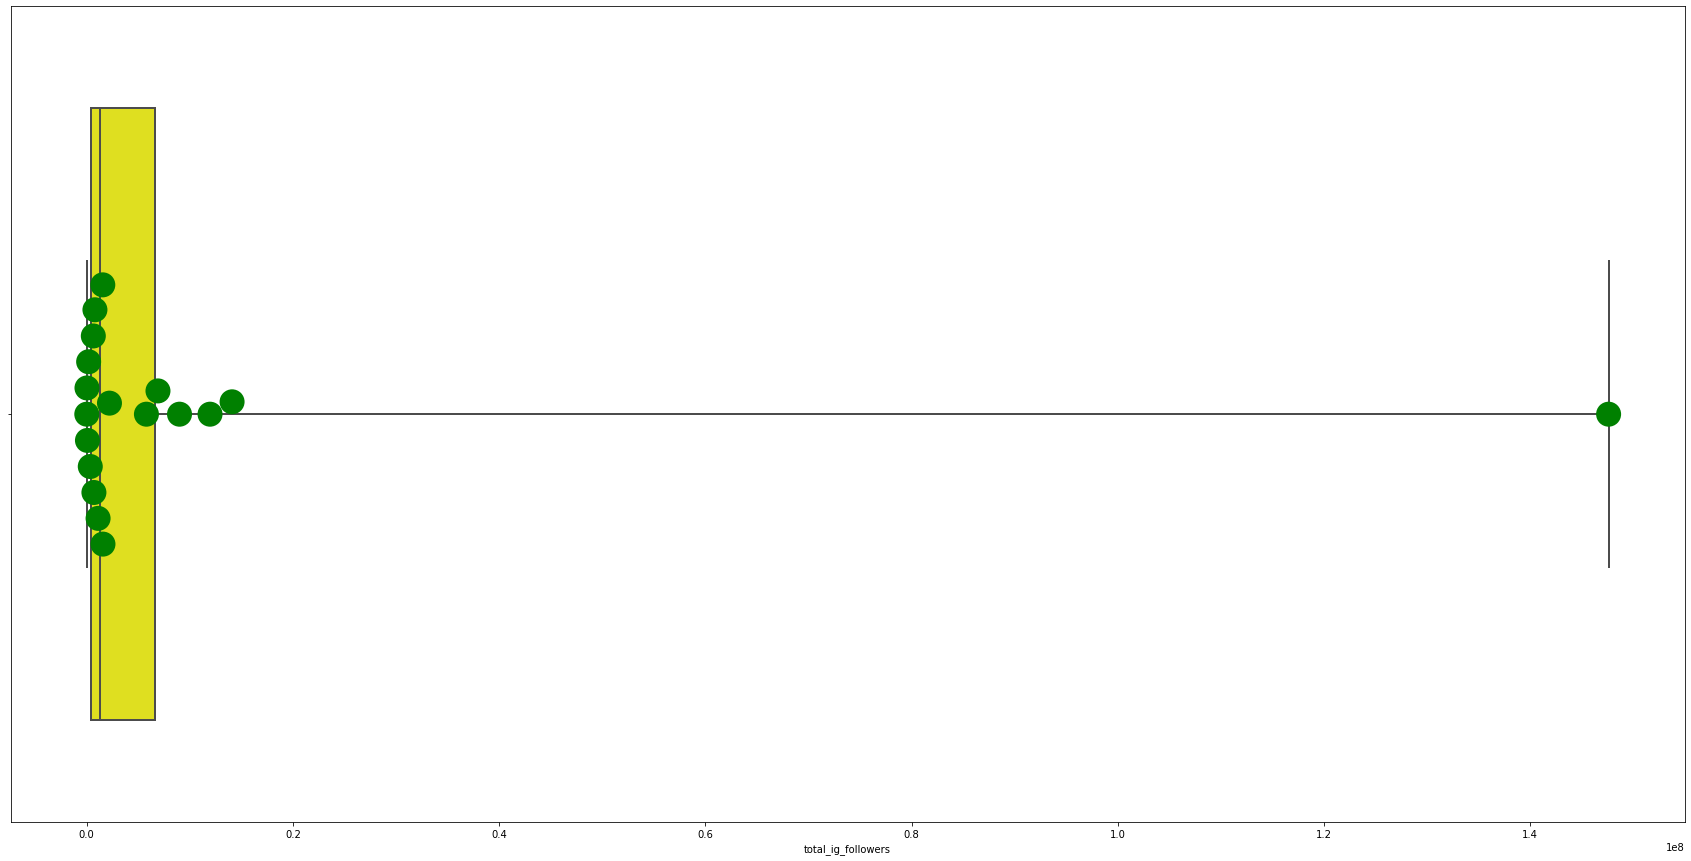

In [103]:
from matplotlib.pyplot import * 

fig = figure(figsize=(30,15))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.boxplot(yt2['total_ig_followers'], fliersize=1,linewidth=2, whis=30,width=.75, color='yellow')
#markers with just twitter
sns.swarmplot(data=df2,x=yt2['total_ig_followers'], color='green', size=25)



In [104]:
get_summary_statistics(yt2['total_ig_followers'].dropna())

Min: 12,356
Mean: 11,370,822
Max: 147,611,462
25th percentile: 423,478
Median: 1,335,650
75th percentile: 6,636,403
Interquartile range (IQR): 6,212,925


In [105]:
#filter dataset to top 50% of total spotify followers

top_artists = yt2.loc[yt2['total_ig_followers'] >= yt2['total_ig_followers'].quantile(.5)]

In [106]:
top_artists.sort_values('total_spotify_followers', ascending=False, inplace=True)

<ipython-input-106-fd6c17aa9078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_artists.sort_values('total_spotify_followers', ascending=False, inplace=True)


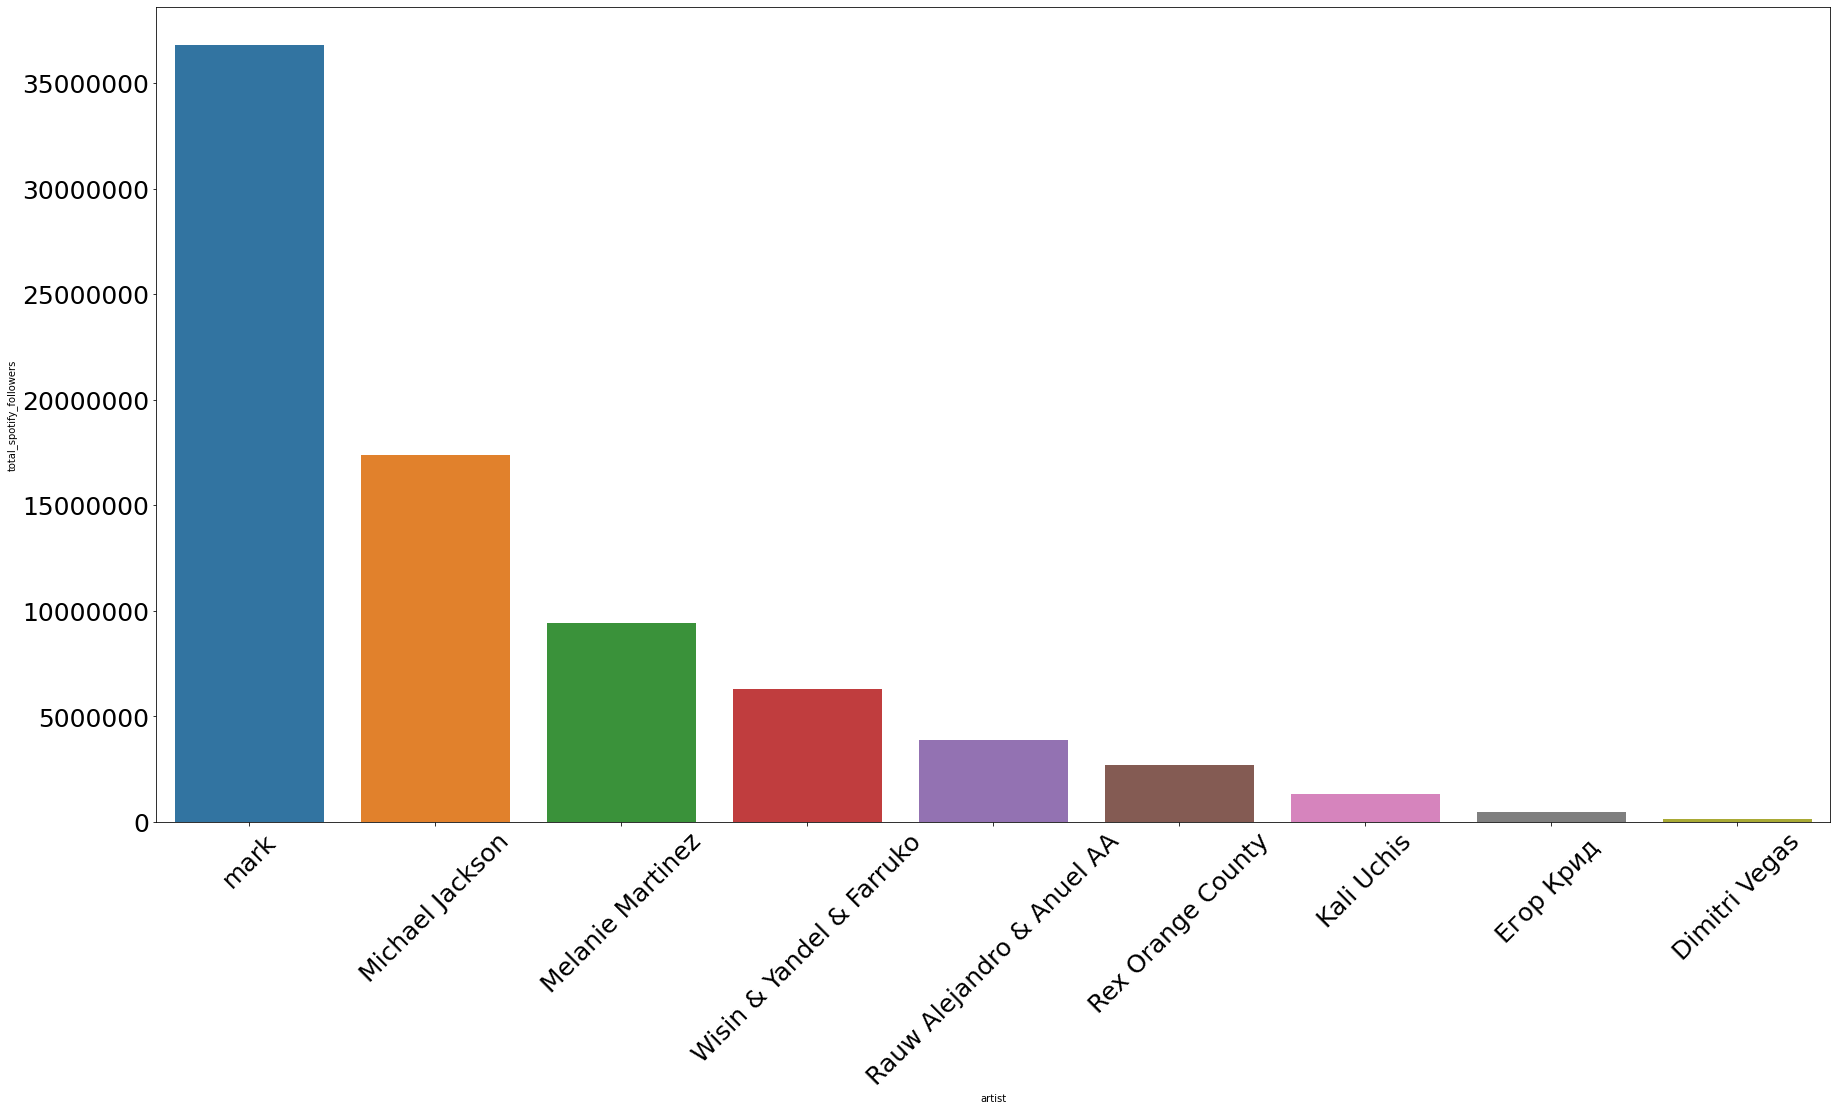

In [108]:
fig = figure(figsize=(30,15))  # define the figure window
ax1  = fig.add_subplot(111)   # define the axis
sns.barplot(data=top_artists, x='artist', y='total_spotify_followers')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') #change xaxis from sci to plain style
plt.tick_params(axis='both', which='major', labelsize=25)


plt.show()